# iLykei Lecture Series    
    
# Machine Learning and Predictive Analytics   
    
# Workshop: Regularized Regression

## Selecting/Eliminating Predictors using Regularization Methods

### Yuri Balasanov, Victor Lavrentyev, Mikhail Tselishchev, &copy; iLykei 2018-2024



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regularization</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lasso Regression</a></span><ul class="toc-item"><li><span><a href="#Prostate-data-example" data-toc-modified-id="Prostate-data-example-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prostate data example</a></span><ul class="toc-item"><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Prepare the data</a></span></li><li><span><a href="#Fitting-linear-model" data-toc-modified-id="Fitting-linear-model-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Fitting linear model</a></span></li><li><span><a href="#Lasso-regression-model" data-toc-modified-id="Lasso-regression-model-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Lasso regression model</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></li><li><span><a href="#Using-Ridge-and-Lasso-regression-with-the-data-from-Workshop-1-from-week-1" data-toc-modified-id="Using-Ridge-and-Lasso-regression-with-the-data-from-Workshop-1-from-week-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using Ridge and Lasso regression with the data from Workshop 1 from week 1</a></span><ul class="toc-item"><li><span><a href="#Simulation-of-the-data" data-toc-modified-id="Simulation-of-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simulation of the data</a></span></li><li><span><a href="#Fitting-linear-models" data-toc-modified-id="Fitting-linear-models-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fitting linear models</a></span></li><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ridge regression</a></span></li><li><span><a href="#Lasso-regression" data-toc-modified-id="Lasso-regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Lasso regression</a></span></li><li><span><a href="#Large-number-of-significant-predictors" data-toc-modified-id="Large-number-of-significant-predictors-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Large number of significant predictors</a></span></li><li><span><a href="#Large-number-of-predictors,-not-all-of-them-are-significant" data-toc-modified-id="Large-number-of-predictors,-not-all-of-them-are-significant-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Large number of predictors, not all of them are significant</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)

# Regularization    

Make simulated data for illustration of regularization method.   

1. Create a function $Y(X)$ that needs to be minimized and find its minimum.

In [3]:
import numpy as np
import pandas as pd

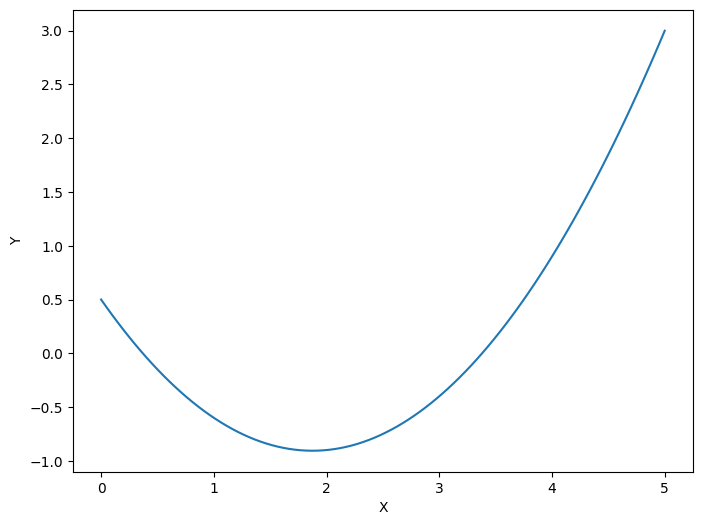

In [4]:
X = np.linspace(0, 5, 100)
Y = 0.5 - 1.5 * X + 0.4 * X**2
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y');

In [5]:
act_min = X[Y.argmin()]  # actual argmin
print(act_min)

1.8686868686868687


2. Add a little noise to the function.

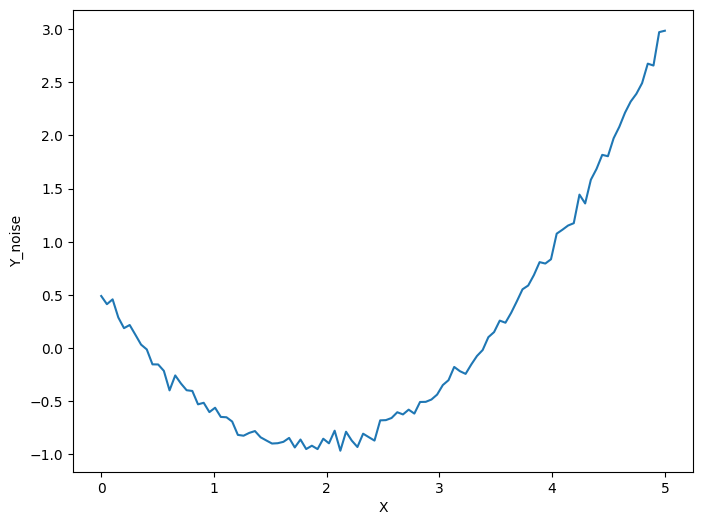

In [6]:
rng = np.random.default_rng(seed=95)
Eps = rng.normal(0, 0.05, size = len(X))
Y_noise = Y + Eps
plt.plot(X, Y_noise)
plt.xlabel('X')
plt.ylabel('Y_noise');

In [7]:
obs_min = X[Y_noise.argmin(0)]  # observed (in contrast to actual) argmin
print(obs_min)

2.121212121212121


Even a little noise may change minimum of the observed data.    

3. Apply ideal regularizator to make search for minimum more stable: 
$$\alpha(X)=0.5-1.5 X +0.4 X^2,$$
where function $\alpha(X)$ is represented by variable `regularizator`.

In [8]:
regularizator = 0.5 - 1.5 * X + 0.4 * X**2

This regularizator is ideal because it "knows" the exact function.   

Select tuning parameter $\lambda$ represented by variable `tune` and minimize function
$$Y(X)+\lambda \alpha(X)$$
instead of $Y(X)$. 

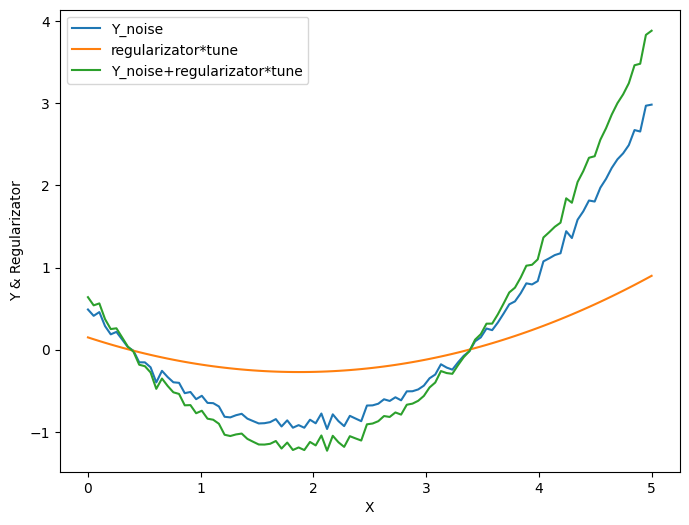

In [9]:
tune = 0.3
plt.plot(X, Y_noise, label='Y_noise')
plt.plot(X, regularizator*tune, label='regularizator*tune')
plt.plot(X, Y_noise+regularizator*tune, label='Y_noise+regularizator*tune')
plt.xlabel('X')
plt.ylabel('Y & Regularizator')
plt.legend();

In [10]:
reg_min = X[(Y_noise+regularizator*tune).argmin()]
print(reg_min)

2.121212121212121


Setting tuning parameter to 0.3 did not help finding the real minimum of $Y(X)$.

Increase the tuning parameter to 1.

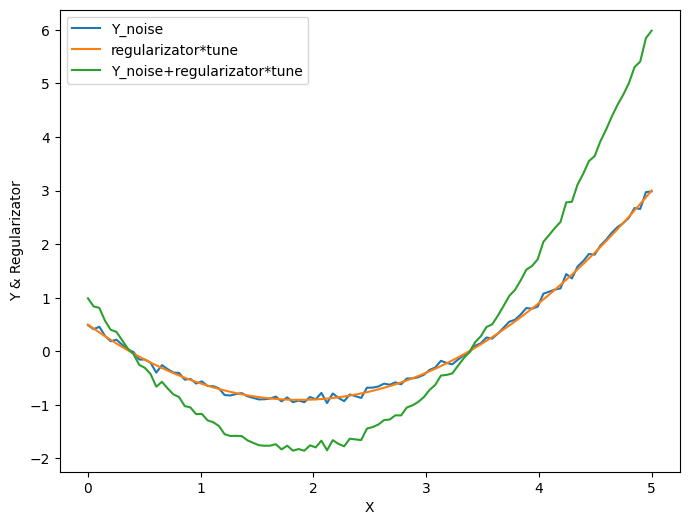

In [11]:
tune = 1
plt.plot(X, Y_noise, label='Y_noise')
plt.plot(X, regularizator*tune, label='regularizator*tune')
plt.plot(X, Y_noise+regularizator*tune, label='Y_noise+regularizator*tune')
plt.xlabel('X')
plt.ylabel('Y & Regularizator')
plt.legend();

In [12]:
reg_min = X[(Y_noise+regularizator*tune).argmin()]
print(reg_min)

1.9191919191919191


Still real minimum of $Y(X)$ is overestimated.    

Increase tuning parameter to 3.  


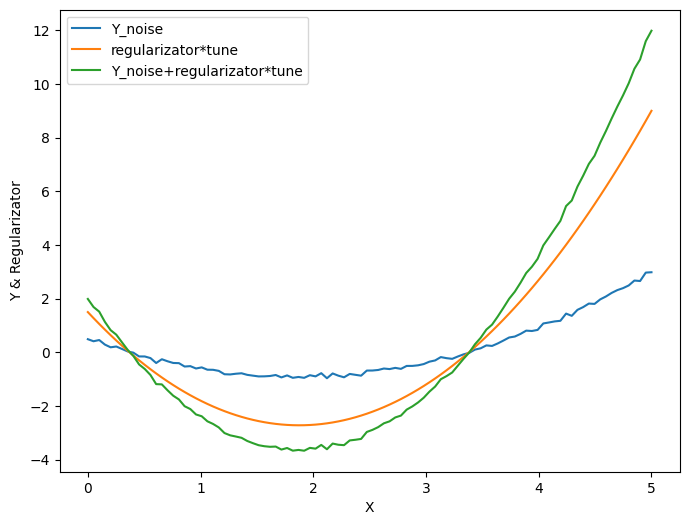

In [13]:
tune = 3
plt.plot(X, Y_noise, label='Y_noise')
plt.plot(X, regularizator*tune, label='regularizator*tune')
plt.plot(X, Y_noise+regularizator*tune, label='Y_noise+regularizator*tune')
plt.xlabel('X')
plt.ylabel('Y & Regularizator')
plt.legend();

In [14]:
reg_min = X[(Y_noise+regularizator*tune).argmin(0)]
print(reg_min)

1.9191919191919191


Now regularization worked: we recovered the actual minimum of the function.    

But in real life we do not know ideal regularizator.    
What if we set regularizator with a little shift in one of the coefficients?    
Consider regularizator
$$\alpha(X)= .5-1.5X+.3X^2,$$
changing the third coefficient to 0.3 instead of 0.4. 

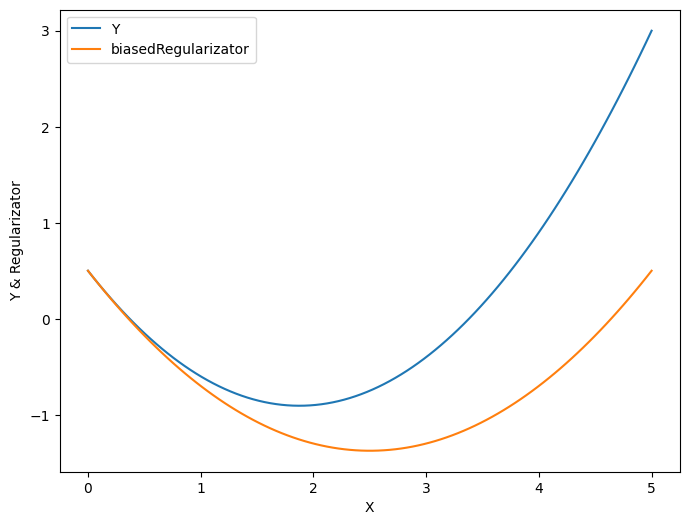

In [15]:
biasedRegularizator = .5 - 1.5 * X + .3 * X**2
plt.plot(X, Y, label='Y')
plt.plot(X, biasedRegularizator, label='biasedRegularizator')
plt.xlabel('X')
plt.ylabel('Y & Regularizator')
plt.legend();

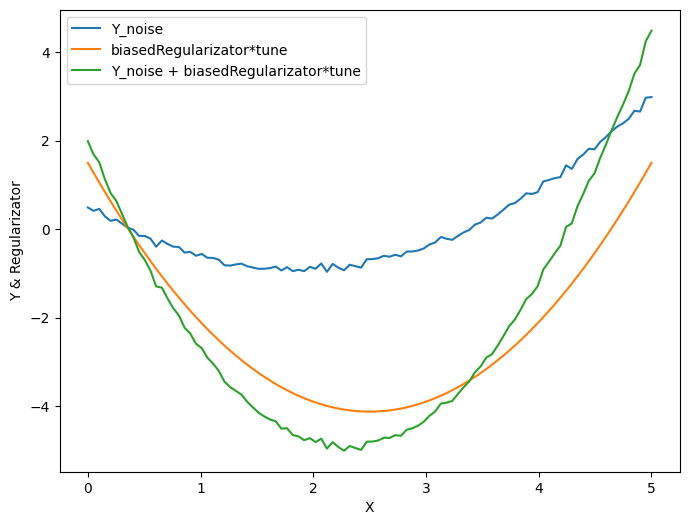

In [16]:
plt.plot(X, Y_noise, label='Y_noise')
plt.plot(X, biasedRegularizator*tune, label='biasedRegularizator*tune')
plt.plot(X, Y_noise + biasedRegularizator*tune, label='Y_noise + biasedRegularizator*tune')
plt.xlabel('X')
plt.ylabel('Y & Regularizator')
plt.legend();

In [17]:
biasedReg_min = X[(Y_noise+biasedRegularizator*tune).argmin(0)]
print(biasedReg_min)

2.2727272727272725


**Lessons:**    
1. Regularization is a very powerful method that allows using additional information about the solution of the problem.    
2. If there is no significant additional information then regularization can be misleading.    
3. When applied to regression without additional knowledge about parameters the problem of bias in the parameters and increased variance of their estimators is replaced by the same issues, but in regularizator.    

# Lasso Regression    

## Prostate data example

### Prepare the data  

Read the data from prostate cancer study described in Elements of Statistical Learning: Data Mining, Inference and Prediction (second Edition), T.Hastie, R.Tibshirani, J. Friedman,2008, Springer.   
Data and other supplemental materials are on the [website of the book](http://statweb.stanford.edu/~tibs/ElemStatLearn/)

In [18]:
prostateData = pd.read_csv("data/prostatedata.csv.xls")
prostateData.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


The goal of the study was to examine correlation between log of prostate-specific antigen `lpsa` as an output and some clinical measures:    

* Log cancer volume `lcavol`   
* Log prostate weight `lweight`   
* Age `age`   
* Log of the amount of benign prostatic hyperplasia `lbph`   
* Seminal vehicle invasion `svi`    
* Log of capsular penetration `lcp`    
* Gleason score `gleason`   
* percent of Gleason scores 4 or 5 `pgg45`

The last column in the file shows which rows were randomly selected for train sample and which for test sample.   

Separate the train sub-sample and normalize the predictors.   

In [19]:
prostateData_norm = prostateData.iloc[:,:8]
prostateData_norm /= prostateData_norm.std()
prostateData_norm["lpsa"] = prostateData["lpsa"]
prostateData_norm["train"] = prostateData["train"]
prostateData_norm.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.491945,6.464487,6.715811,-0.955534,0.0,-0.99145,8.308706,0.000000,-0.430783,T
1,-0.843570,7.748690,7.790341,-0.955534,0.0,-0.99145,8.308706,0.000000,-0.162519,T
2,-0.433408,6.281915,9.939400,-0.955534,0.0,-0.99145,9.693490,0.709118,-0.162519,T
3,-1.021506,7.662705,7.790341,-0.955534,0.0,-0.99145,8.308706,0.000000,-0.162519,T
4,0.637536,8.011865,8.327606,-0.955534,0.0,-0.99145,8.308706,0.000000,0.371564,T


In [20]:
print(prostateData_norm.iloc[:,:8].std())

lcavol     1.0
lweight    1.0
age        1.0
lbph       1.0
svi        1.0
lcp        1.0
gleason    1.0
pgg45      1.0
dtype: float64


In [21]:
prostateData_norm_train = prostateData_norm[prostateData_norm["train"] == "T"].drop(columns='train')
prostateData_norm_train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.491945,6.464487,6.715811,-0.955534,0.0,-0.99145,8.308706,0.000000,-0.430783
1,-0.843570,7.748690,7.790341,-0.955534,0.0,-0.99145,8.308706,0.000000,-0.162519
2,-0.433408,6.281915,9.939400,-0.955534,0.0,-0.99145,9.693490,0.709118,-0.162519
3,-1.021506,7.662705,7.790341,-0.955534,0.0,-0.99145,8.308706,0.000000,-0.162519
4,0.637536,8.011865,8.327606,-0.955534,0.0,-0.99145,8.308706,0.000000,0.371564


In [22]:
print('Train size =', prostateData_norm_train.shape[0])

Train size = 67


In [23]:
prostateData_norm_test = prostateData_norm[prostateData_norm["train"] == "F"].drop(columns='train')
prostateData_norm_test.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
6,0.625444,8.107906,8.596238,0.424030,0.0,-0.991450,8.308706,0.000000,0.765468
8,-0.658843,8.261943,6.312862,-0.955534,0.0,-0.991450,8.308706,0.000000,1.047319
9,0.189325,7.573434,8.461922,-0.955534,0.0,-0.991450,8.308706,0.000000,1.047319
14,1.023202,8.034381,7.656025,-0.955534,0.0,-0.308087,9.693490,0.177280,1.398717
21,1.747154,8.172155,8.058973,1.016512,0.0,0.964115,9.693490,0.709118,1.658228


In [24]:
print('Test size =', prostateData_norm_test.shape[0])

Test size = 30


In [25]:
X_train = prostateData_norm_train.drop(columns=['lpsa'])
y_train = prostateData_norm_train['lpsa']
X_test = prostateData_norm_test.drop(columns=['lpsa'])
y_test = prostateData_norm_test['lpsa']

### Fitting linear model   

Fit linear model.

In [26]:
import statsmodels.api as sm

allPredictors_lm = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(allPredictors_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.04e-12
Time:                        19:21:49   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4292      1.554      0.276      0.7

We see several significant predictors: `lcavol`, `lweight`, `svi` and two barely significant predictors `lcp` and `lbph`.    
Predictors `gleason` and `age` do not appear to be significant at all.

Check correlations between predictors.


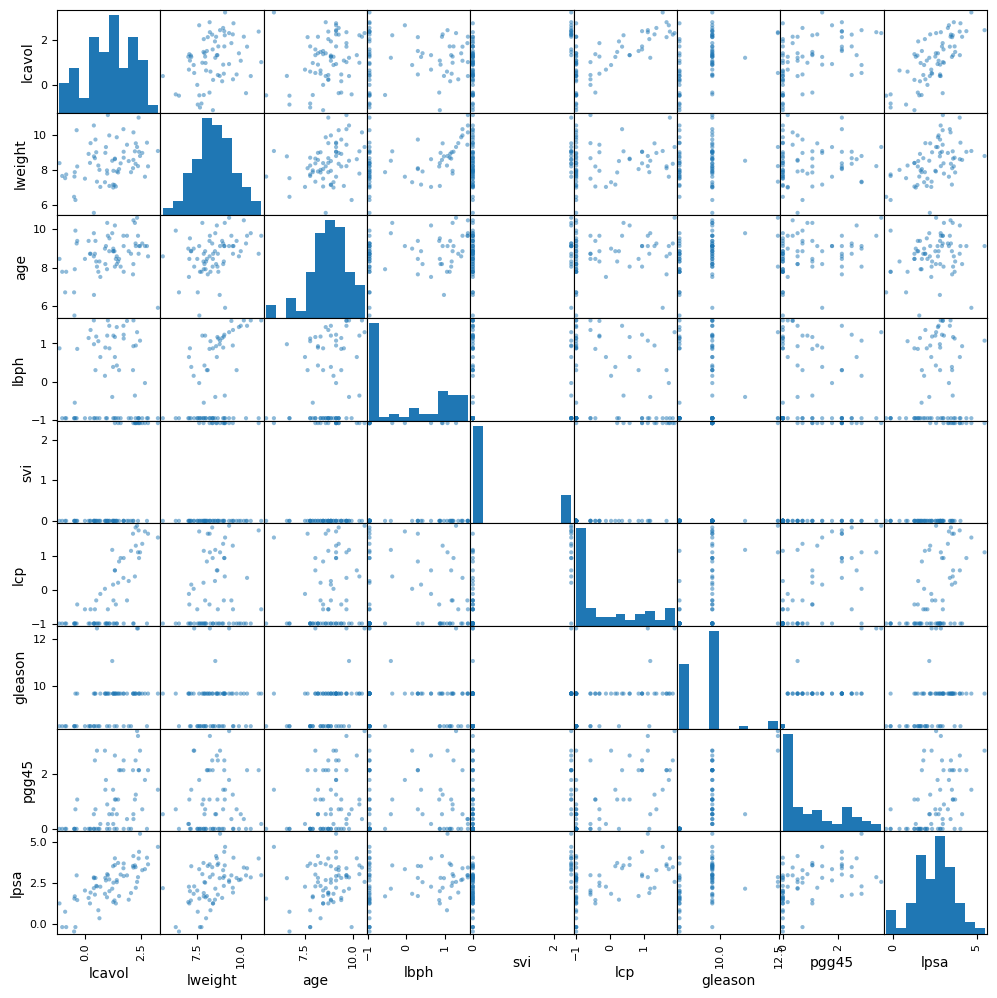

In [27]:
pairs = pd.plotting.scatter_matrix(prostateData_norm_train, figsize=(12,12))

In [28]:
print(X_train.corr().round(3))

         lcavol  lweight    age   lbph    svi    lcp  gleason  pgg45
lcavol    1.000    0.300  0.286  0.063  0.593  0.692    0.426  0.483
lweight   0.300    1.000  0.317  0.437  0.181  0.157    0.024  0.074
age       0.286    0.317  1.000  0.287  0.129  0.173    0.366  0.276
lbph      0.063    0.437  0.287  1.000 -0.139 -0.089    0.033 -0.030
svi       0.593    0.181  0.129 -0.139  1.000  0.671    0.307  0.481
lcp       0.692    0.157  0.173 -0.089  0.671  1.000    0.476  0.663
gleason   0.426    0.024  0.366  0.033  0.307  0.476    1.000  0.757
pgg45     0.483    0.074  0.276 -0.030  0.481  0.663    0.757  1.000


In [29]:
print((X_train.corr() ** 2).round(3))

         lcavol  lweight    age   lbph    svi    lcp  gleason  pgg45
lcavol    1.000    0.090  0.082  0.004  0.352  0.479    0.182  0.233
lweight   0.090    1.000  0.100  0.191  0.033  0.025    0.001  0.006
age       0.082    0.100  1.000  0.083  0.017  0.030    0.134  0.076
lbph      0.004    0.191  0.083  1.000  0.019  0.008    0.001  0.001
svi       0.352    0.033  0.017  0.019  1.000  0.451    0.094  0.232
lcp       0.479    0.025  0.030  0.008  0.451  1.000    0.227  0.439
gleason   0.182    0.001  0.134  0.001  0.094  0.227    1.000  0.573
pgg45     0.233    0.006  0.076  0.001  0.232  0.439    0.573  1.000


In [30]:
print(X_train.corr() ** 2 >.5)

         lcavol  lweight    age   lbph    svi    lcp  gleason  pgg45
lcavol     True    False  False  False  False  False    False  False
lweight   False     True  False  False  False  False    False  False
age       False    False   True  False  False  False    False  False
lbph      False    False  False   True  False  False    False  False
svi       False    False  False  False   True  False    False  False
lcp       False    False  False  False  False   True    False  False
gleason   False    False  False  False  False  False     True   True
pgg45     False    False  False  False  False  False     True   True


Matrix of determination coefficients shows that there is one significant determination coefficient (>0.5) between predictors: $\rho^2(ppg45,gleason)=0.573$.  
The other three noticeable determination coefficients are $\rho^2(lcp,lcavol)=0.479$, $\rho^2(lcp,svi)=0.45$  and $\rho^2(lcp,pgg45)=0.439.$    

Correlations between predictors make selection of predictors difficult.    
For example, predictor `lcp` is correlated with `lcavol`, `svi` and `pgg45`.    
In the presence of all predictors `svi` is significant with 5% level, but `lcp` is not.    


In [31]:
print(allPredictors_lm.pvalues > 0.05)

const       True
lcavol     False
lweight    False
age         True
lbph       False
svi        False
lcp         True
gleason     True
pgg45       True
dtype: bool


But after removal of `lcp` predictor `svi` becomes insignificant.

In [32]:
nolcp_lm = sm.OLS(y_train,
                  sm.add_constant(X_train.drop(columns='lcp'))).fit()
print(nolcp_lm.pvalues > 0.05)

const       True
lcavol     False
lweight    False
age         True
lbph       False
svi         True
gleason     True
pgg45       True
dtype: bool


This is a big challenge for any greedy algorithm.    

Consider removing all insignificant predictors: `age`, `lcp`, `gleason` and `pgg45`.    

We can test significance of groups of predictors by using F-statistic
$$F=\frac{(RSS_0-RSS_1)/(p_1-p_0)}{RSS_1/(N-p_1-1)},$$
where $RSS_1$ is the residual sum of squares of bigger model including all $p_1+1$ parameters $\beta_0,\beta_1,\ldots,\beta_{p_1}$; $RSS_0$ is the residual sum of squares of the model that has only $p_0+1$ parameters not equal to zero and the rest $p_1-p_0$ parameters equal to zero: $\beta_0,\beta_1,\ldots,\beta_{p_0},\beta_{p_0+1}=0,\ldots,\beta_{p_1}=0$.   
Such F-statistic measures significance of change in sum of squares of the bigger model if a group of predictors gets eliminated.   
Under $H_0:\beta_{p_0+1}=0,\ldots,\beta_{p_1}=0$ the statistic has F-distribution: $F \sim F_{p_1-p_0,N-{p_1}-1}$.


In [33]:
significantPredictors_lm = sm.OLS(y_train,
                           sm.add_constant(X_train.drop(['age','lcp', 'gleason', 'pgg45'],axis=1))).fit()
RSS1 = np.sum(allPredictors_lm.resid**2)
print('RSS1 =', RSS1)
RSS0 = np.sum(significantPredictors_lm.resid**2)
print('RSS0 =', RSS0)

RSS1 = 29.426384459908398
RSS0 = 32.81499474881555


In [34]:
statisticF = (RSS0-RSS1)/(8-4) / (RSS1/(67-8-1))
print(statisticF)

1.6697548846375219


In [35]:
import scipy.stats as stats

print(stats.f.sf(statisticF, 8-4, 67-8-1))  # sf == 1-cdf

0.16933707265225123


This shows that p-value is large and $H_0:\beta_{p_0+1}=0,\ldots,\beta_{p_1}=0$ cannot be rejected.    

Check assumptions of the model and mean square error of prediction of `significantPredictors_lm`.     


In [36]:
print(significantPredictors_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     29.98
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           6.91e-14
Time:                        19:21:51   Log-Likelihood:                -71.156
No. Observations:                  67   AIC:                             152.3
Df Residuals:                      62   BIC:                             163.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3259      0.780     -0.418      0.6

Note that `lbph` is still not significant with 5% level.

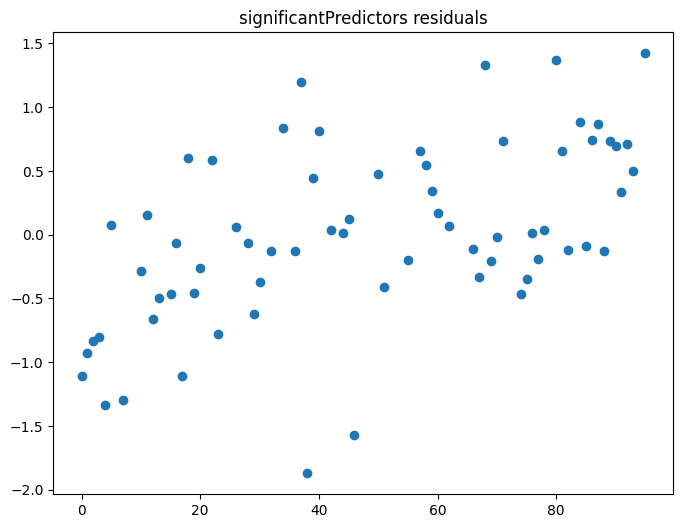

In [37]:
plt.plot(significantPredictors_lm.resid, 'o')
plt.title('significantPredictors residuals');

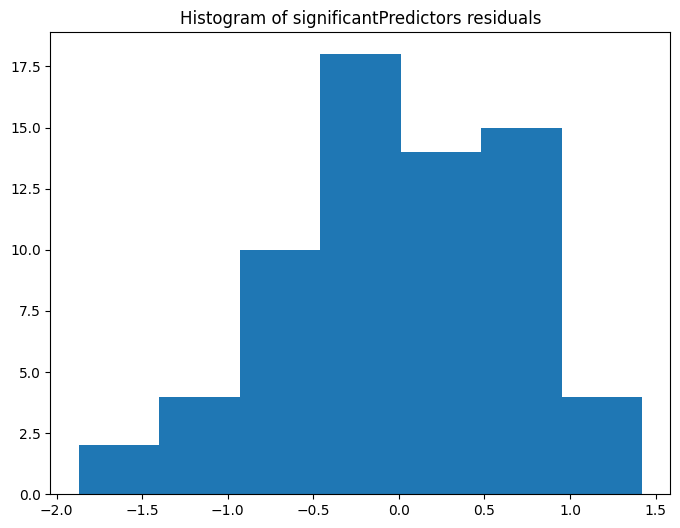

In [38]:
plt.hist(significantPredictors_lm.resid, bins=7)
plt.title('Histogram of significantPredictors residuals');

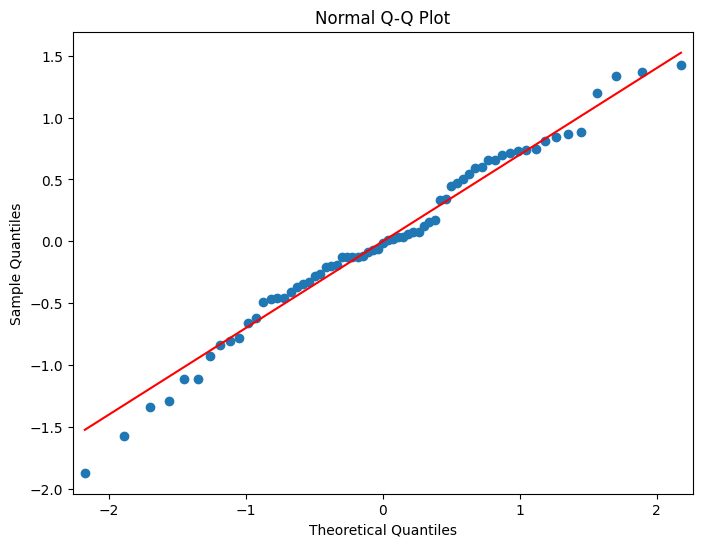

In [39]:
sm.qqplot(significantPredictors_lm.resid, line='s')
plt.title('Normal Q-Q Plot');

Obviously, assumptions of linear model are not satisfied, 

In [40]:
print(significantPredictors_lm.aic)

152.31269099964987


In [41]:
print(allPredictors_lm.aic)

153.01010201797789


In [42]:
from sklearn import linear_model

significantPredictors_lm2 = linear_model.LinearRegression()
significantPredictors_lm2.fit(X_train.drop(['age','lcp', 'gleason', 'pgg45'],axis=1), y_train)
testPredict = significantPredictors_lm2.predict(X_test.drop(['age','lcp', 'gleason', 'pgg45'],axis=1))
MSE_significantPredictors = np.mean((y_test-testPredict)**2)
print(MSE_significantPredictors)

0.4563321220401627


In [43]:
allPredictors_lm2 = linear_model.LinearRegression()
allPredictors_lm2.fit(X_train, y_train)
testPredict = allPredictors_lm2.predict(X_test)
MSE_allPredictors = np.mean((y_test-testPredict)**2)
print(MSE_allPredictors)

0.5212740055076004


In [44]:
# model without predictors (just intercept)
testPredict_mean = np.mean(y_train)
MSE_meanPredictor = np.mean((y_test-testPredict_mean)**2)
print(MSE_meanPredictor)

1.0567332280603818


Using both AIC and mean square prediction error as measures of goodness of fit we show that the model with only significant predictors is better than the model with all predictors. 

### Lasso regression model   

Fit lasso regression model to train data using `sklearn` package.

In [45]:
from sklearn.linear_model import Lasso

lassoProstate = Lasso(alpha=0.1)
lassoProstate.fit(X_train, y_train)

Lasso(alpha=0.1)

Parameter $R^2$-score shows percent of deviance explained.

In [46]:
lambd_values = np.logspace(-2, 0, 10)

scores = []
for lambd in lambd_values:
    lasso = Lasso(alpha=lambd, fit_intercept=False)
    lasso.fit(X_train, y_train)
    scores.append(lasso.score(X_train, y_train))

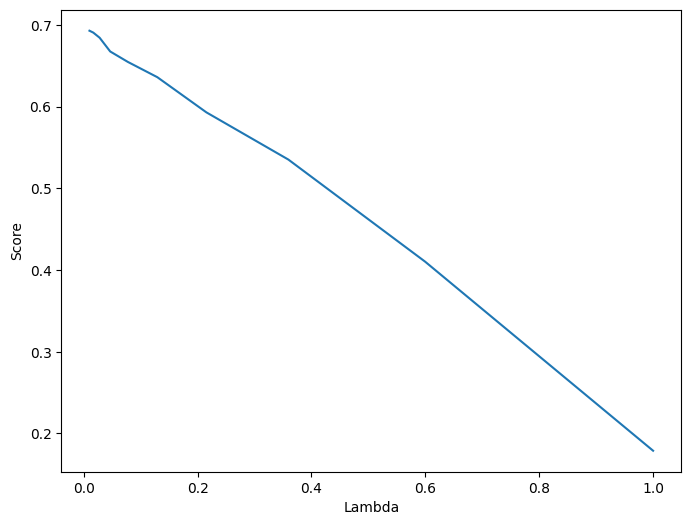

In [47]:
plt.plot(lambd_values, scores)
plt.xlabel("Lambda")
plt.ylabel("Score");

This plot shows how explained deviance (%) grows as λ becomes smaller.

The following plot shows trajectories of coefficients as $L_1$-norm changes, where $L_1$-norm is $|| \mathbf{\beta}||=\sum_i |\beta_i|$.  

In [48]:
lambd_values = np.logspace(-2, 2, 100)

coefs = []
l1_norm = []
for lambd in lambd_values:
    lasso = Lasso(alpha=lambd, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    l1_norm.append(np.sum(np.abs(lasso.coef_)))

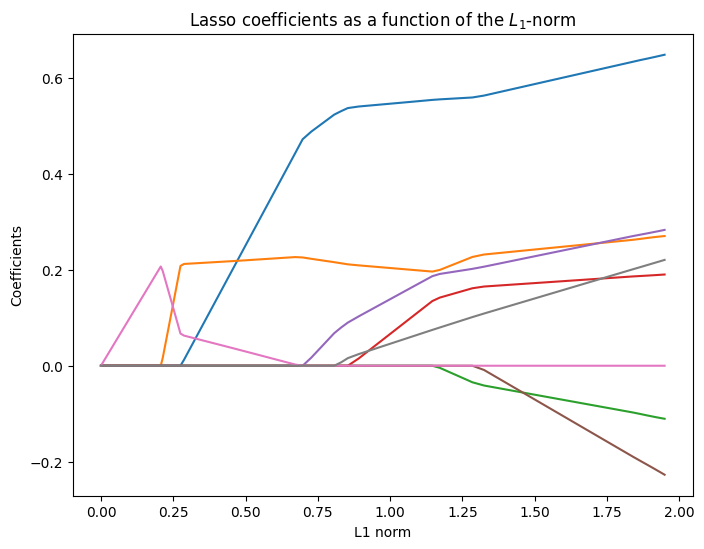

In [49]:
plt.plot(l1_norm, coefs)
plt.xlabel("L1 norm")
plt.ylabel("Coefficients")
plt.title("Lasso coefficients as a function of the $L_1$-norm");


The graph shows how coefficients become small and turn into zeros as $L_1$-norm decreases.    

Next, use cross validation to find the best level of $\lambda$.   
 

In [50]:
from sklearn.linear_model import LassoCV
lassoProstate = LassoCV(cv=10)
lassoProstate.fit(X_train, y_train);

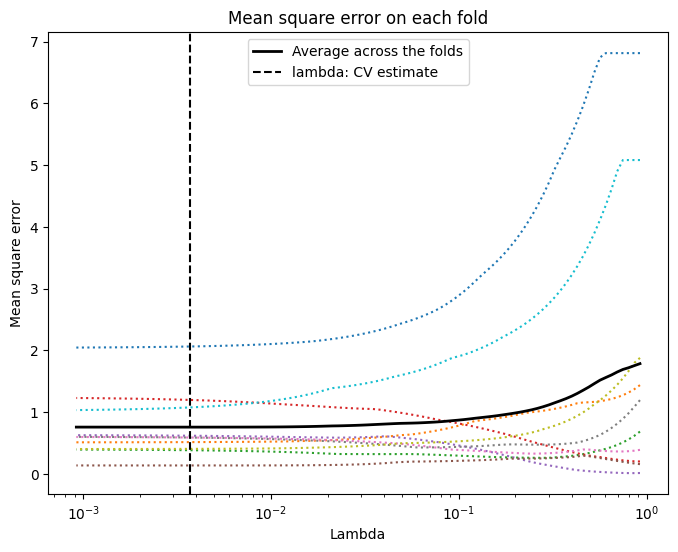

In [51]:
plt.semilogx(lassoProstate.alphas_, lassoProstate.mse_path_, ":")

plt.plot(
    lassoProstate.alphas_ ,
    lassoProstate.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassoProstate.alpha_, linestyle="--", color="k", label="lambda: CV estimate"
)

plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");


The plot shows how mean square error changes with $\lambda$.   
  
Vertical dashed line shows the best parameter $\lambda$.   
The best $\lambda$ is returned in `alpha_`. 
   

In [52]:
bestlam = lassoProstate.alpha_
print(bestlam)

0.003712592987088912


Predict the output of the test sample using the model fitted to the train sample and calculate mean square prediction error.

In [53]:
lasso_pred = lassoProstate.predict(X_test)
MSE_lasso = np.mean((lasso_pred - y_test)**2)
print(MSE_lasso)

0.5107817763631911


Find lasso coefficients and compare them with the coefficients of linear model 

In [54]:
l_coef = pd.DataFrame(allPredictors_lm.params, columns=["Lm"])
l_coef["Lasso"]= np.append(lassoProstate.intercept_, lassoProstate.coef_)
l_coef

,Lm,Lasso
const,0.429170,0.270851
lcavol,0.679528,0.667628
lweight,0.263053,0.262421
age,-0.141465,-0.135068
lbph,0.210147,0.205579
svi,0.305201,0.298135
lcp,-0.288493,-0.264358
gleason,-0.021305,-0.005152
pgg45,0.266956,0.243852


Compare mean square prediction errors:

In [55]:
print("Null   = ", MSE_meanPredictor)
print("Linear = ", MSE_allPredictors)
print("Linear'= ", MSE_significantPredictors)
print("Lasso  = ", MSE_lasso)

Null   =  1.0567332280603818
Linear =  0.5212740055076004
Linear'=  0.4563321220401627
Lasso  =  0.5107817763631911


### PCA

Apply the PCA method to the same data.    
The final outputs below are obtained using 5 PCA factors as predictors in linear model.    

<span style="color:red">(Skipped Code)</span>


In [56]:
from sklearn.decomposition import PCA

prostateData_PCA = PCA()
prostateData_PCA.fit(X_train)
prostateData_PCA_summary = pd.DataFrame({'Standard deviation': np.sqrt(prostateData_PCA.explained_variance_),
                               'Proportion of Variance': prostateData_PCA.explained_variance_ratio_,
                               'Cumulative Proportion': np.cumsum(prostateData_PCA.explained_variance_ratio_)},
                               columns=['Standard deviation','Proportion of Variance','Cumulative Proportion'],
                               index=[ "Comp.%i" %(i+1) for i in range(prostateData_PCA.n_components_)])
print('PCA summary:')
prostateData_PCA_summary.T

PCA summary:


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8
Standard deviation,1.892414,1.336453,1.040685,0.793937,0.716864,0.632754,0.531816,0.424457
Proportion of Variance,0.423415,0.211175,0.128048,0.074526,0.060759,0.047337,0.033439,0.021301
Cumulative Proportion,0.423415,0.634590,0.762638,0.837164,0.897922,0.945260,0.978699,1.000000


In [57]:
nFactors = 8
factorLoadings = pd.DataFrame(prostateData_PCA.components_[:nFactors, :],
                              columns= X_train.columns,
                              index=[ "Comp.%i" %(i+1) for i in range(nFactors)])
factors_train  = pd.DataFrame(prostateData_PCA.transform(X_train)[:, :nFactors],
                              columns =["Comp.%i" %(i+1) for i in range(nFactors)],
                              index=X_train.index)
zeroLoading = prostateData_PCA.mean_

In [58]:
def rel_imp_me(X, y): 
    names = X.columns
    ser = pd.Series(index = names, dtype='float64')
    lm0 = sm.OLS(y, sm.add_constant(X)).fit()
    for c in names:
        lm = sm.OLS(y, sm.add_constant(X[names.drop(c)])).fit()
        ser[c] = lm0.rsquared - lm.rsquared 
    res = pd.DataFrame(columns =['last', 'first', 'betasq', 'pratt'], index=names)
    res['last'] = ser
    corr = X.apply(lambda x: np.corrcoef(y,x)[0,1], axis=0)
    res['first'] = corr**2
    sx = X.apply(np.std, axis=0)
    res['betasq'] = (lm0.params[names] * sx / np.std(y))**2
    res['pratt'] = (lm0.params[names] * sx / np.std(y)) * corr
    return res


metrics_PCA = rel_imp_me(factors_train, y_train)
print('Relative importance measures:')
metrics_PCA

Relative importance measures:


,last,first,betasq,pratt
Comp.1,0.472279,0.472279,0.472279,0.472279
Comp.2,0.059002,0.059002,0.059002,0.059002
Comp.3,0.067062,0.067062,0.067062,0.067062
Comp.4,0.013332,0.013332,0.013332,0.013332
Comp.5,0.007201,0.007201,0.007201,0.007201
Comp.6,0.007755,0.007755,0.007755,0.007755
Comp.7,0.039376,0.039376,0.039376,0.039376
Comp.8,0.028364,0.028364,0.028364,0.028364


In [59]:
first_PCA_rank = metrics_PCA['first'].rank(ascending=False)
metrics_PCA_sort = pd.DataFrame({"Predictors": first_PCA_rank.index,
                                 "Rank": first_PCA_rank.values}).sort_values(by="Rank") 
orderedFactors_train = pd.DataFrame(factors_train, columns=metrics_PCA_sort["Predictors"])
orderedLoadings = pd.DataFrame(factorLoadings.T, columns=metrics_PCA_sort["Predictors"])
print('Ordered factors for train data (head):')
orderedFactors_train.head()

Ordered factors for train data (head):


Predictors,Comp.1,Comp.3,Comp.2,Comp.7,Comp.8,Comp.4,Comp.6,Comp.5
0,-3.028275,-0.281548,-2.160859,0.015615,-0.050018,-0.564205,0.384151,-0.109482
1,-2.672572,-0.198010,-0.957099,0.245040,-0.183593,0.183459,0.572525,0.715095
2,-1.435018,2.092668,-1.374674,0.031096,-0.188689,1.419275,0.692812,-0.189325
3,-2.770835,-0.118565,-1.017178,0.290276,-0.226749,0.172573,0.693956,0.741656
4,-1.816898,-0.465864,-0.555113,-0.033897,0.214758,0.693150,-0.301580,0.144358


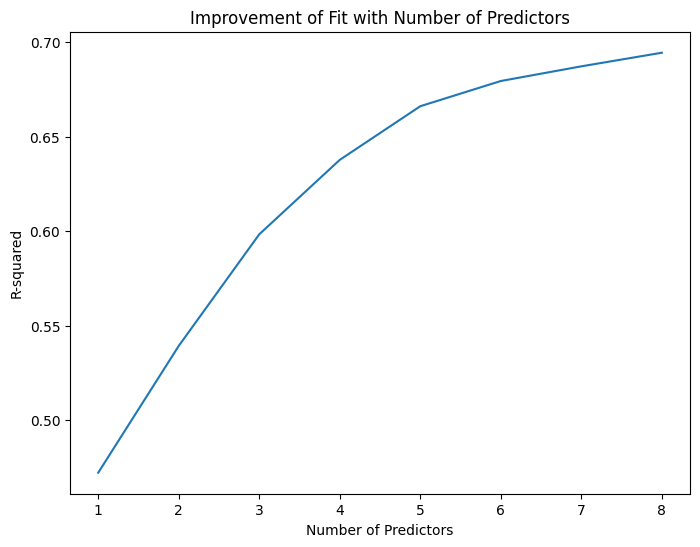

In [60]:
orderedPCA_R2 = [sm.OLS(y_train, sm.add_constant(orderedFactors_train.iloc[:,:j])).fit().rsquared \
                 for j in range(1, nFactors+1)]
plt.plot(range(1, nFactors+1),orderedPCA_R2)

plt.title("Improvement of Fit with Number of Predictors")
plt.ylabel("R-squared")
plt.xlabel("Number of Predictors");

In [61]:
m5_PCA = sm.OLS(y_train, sm.add_constant(orderedFactors_train.iloc[:,:5])).fit()
coefficients_PCA = m5_PCA.params
restoredSlopes = np.dot(orderedLoadings.iloc[:,:5], coefficients_PCA[1:6])

Compare coefficients returned by the lasso regression, linear model and PCA methods. 


In [62]:
coefficientsComparison = pd.DataFrame({'Lasso': lassoProstate.coef_, 
                                       'Lm' : allPredictors_lm.params[1:9],
                                       'PCR' : restoredSlopes}, 
                                      index=X_train.columns)
print('Slopes estimates for different models:')
coefficientsComparison

Slopes estimates for different models:


,Lasso,Lm,PCR
lcavol,0.667628,0.679528,0.524795
lweight,0.262421,0.263053,0.323933
age,-0.135068,-0.141465,-0.003454
lbph,0.205579,0.210147,0.093070
svi,0.298135,0.305201,0.434445
lcp,-0.264358,-0.288493,-0.322243
gleason,-0.005152,-0.021305,-0.054507
pgg45,0.243852,0.266956,0.281250


PCR method used all original predictors, but if the number of factors is reduced to 5 the regression problem in fact has smaller number of predictors to fit.   
If all PCA factors are used as predictors then coefficients are expected to be the same as coefficients of the linear model.


Calculate MSE for PCR method:

1. With the test data calculate test metafeatures using definition of factors in PCR:
    $$F=X_0 L$$
   where
    - $X_0$ is the test matrix of the original features centered by the zero loading of the PCA model fitted to the train feature matrix
    - $L$ is the matrix of loadings of the PCA model fitted to the train feature matrix

2. Reorder test metafeatures in the order of relative importance of factors of the PCA model fitted to the original features

3. Predict test responce sample with the linear model containing the best 5 train metafeatures using test metafeatures as new data

4. Calculate MSE of the PCR model

<span style="color:red">(Skipped Code)</span>


In [63]:
factors_test = pd.DataFrame(prostateData_PCA.transform(X_test)[:, :nFactors],
                            columns =["Comp.%i" %(i+1) for i in range(nFactors)],
                            index=X_test.index)
orderedFactors_test = pd.DataFrame(factors_test, columns=orderedFactors_train.columns)
pcr5_lm2 = linear_model.LinearRegression()
pcr5_lm2.fit(orderedFactors_train.iloc[:,:5], y_train)
testPredict = pcr5_lm2.predict(orderedFactors_test.iloc[:,:5])
MSE_pcr5 = np.mean((y_test-testPredict)**2)

In [64]:
print('MSE on test data:')
print("Null   = ", MSE_meanPredictor)
print("Linear = ", MSE_allPredictors)
print("Linear'= ", MSE_significantPredictors)
print("Lasso  = ", MSE_lasso)
print("PCR    = ", MSE_pcr5)

MSE on test data:
Null   =  1.0567332280603818
Linear =  0.5212740055076004
Linear'=  0.4563321220401627
Lasso  =  0.5107817763631911
PCR    =  0.5755578082150293


# Using Ridge and Lasso regression with the data from Workshop 1 from week 1     

## Simulation of the data    

In this experiment simulate a series of nested linear models with large number of independent predictors.    
The model is:
$$Y_{i,j} = \beta_0 + \beta_1 X_{i,1} + \ldots + \beta_{i,j} + \epsilon_i;~~i=1,\ldots,500;~~j=2,\ldots,500. $$
So, the first model of the series, $j=2$ is
$$Y_{i,2} = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \epsilon_i;~~i=1,\ldots,500.$$
And the last model of the series, $j=500$ is
$$Y_{i,500} = \beta_0 + \beta_1 X_{i,1} + \ldots + \beta_{i,500} + \epsilon_i;~~i=1,\ldots,500.$$
All nested models have the same vector of residuals $\epsilon_i;~~i=1,\ldots,500;\epsilon_i \sim Norm(0,1)$.     
All 500 predictors $X_{i,j};~~j=1,\ldots,500$ are independent samples from $Norm(0,2).$     
Slopes of the predictors are randomly selected from uniform distribution on $[1,3]$.    


In [65]:
rng = np.random.default_rng(seed=1234567)

Epsilon = rng.normal(0,1, size=500)
colnames = [ "X%i" %(j+1) for j in range(500)]
X = pd.DataFrame(rng.normal(0,2, size=(500, 500)), columns=colnames)
slopesSet = np.random.uniform(low=1, high=3, size=500)

Y = np.column_stack([1 + np.dot(X.iloc[:, :j], slopesSet[:j]) + Epsilon for j in range(2, 501)])

## Fitting linear models

Fit linear model with the first 10 predictors.   


In [66]:
m10 = sm.OLS(Y[:,8],sm.add_constant(X.iloc[:,:10])).fit()
#print(m10.summary())

Fit linear model with 491 predictors.

In [67]:
m491 = sm.OLS(Y[:,489],sm.add_constant(X.iloc[:,:491])).fit()
#print(m491.summary())

## Ridge regression

Apply ridge regression to the data with 10 predictors.

In [68]:
from sklearn.linear_model import Ridge
ridge10 = Ridge()
print(ridge10.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


Separate the sample into `train` and `test`.

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:10], Y[:,8], 
                                                    test_size=0.5, random_state=1)


Select the best parameter $\lambda$ using cross validation on train set. 



In [70]:
from sklearn.linear_model import RidgeCV
ridge10 = RidgeCV(alphas=(0.001, 0.01, 0.1,  1. ), store_cv_values = True)
ridge10.fit(X_train, y_train);

/Users/urij/Education/MLCourse2024/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


/Users/urij/Education/MLCourse2024/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


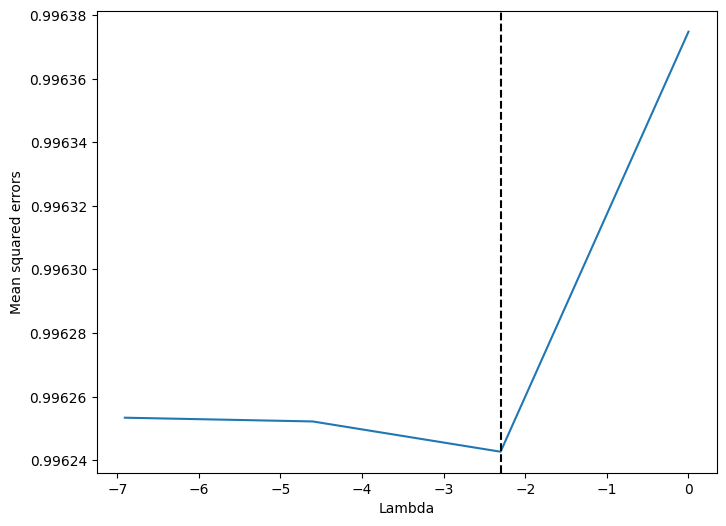

In [71]:
plt.plot(np.log(ridge10.alphas), np.mean(ridge10.cv_values_, axis=0))
plt.axvline(np.log(ridge10.alpha_), linestyle="--", color="k", label="lambda: CV estimate")

plt.xlabel("Lambda")
plt.ylabel("Mean squared errors");


In [72]:
bestlam = ridge10.alpha_
print(bestlam)

0.1


Calculate mean squared prediction error for the best selected $\lambda=$ `bestlam`.

In [73]:
ridge_pred = ridge10.predict(X_test) 
ridge_MSE = np.mean((ridge_pred-y_test)**2)
print(ridge_MSE)

1.1638144847202938


Compare the mean squared prediction error

In [74]:
train_m10 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
lm_pred = train_m10.predict(sm.add_constant(X_test))
lm_MSE = np.mean((lm_pred - y_test)**2)
print(lm_MSE)

1.1633982439088297


Ridge regression did not select predictors. It is expected because we simulated all predictors to be significant.    
Ridge regression made a small improvement to mean squared prediction error. This is consistent with expectation because it has one additional parameter.        

Regularization is expected to reduce number of predictors when there are collinear (highly correlated) predictors.   
Predictors in this example are not collinear.

## Lasso regression

Fit lasso regression to the first 10 predictors.


In [75]:
lasso10 = Lasso()
lasso10.fit(X_train, y_train)

Lasso()

In [76]:
lambd_values = np.logspace(-4, 4, 200)

coefs = []
l1_norm = []
for lambd in lambd_values:
    lasso = Lasso(alpha=lambd, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    l1_norm.append(np.sum(np.abs(lasso.coef_)))

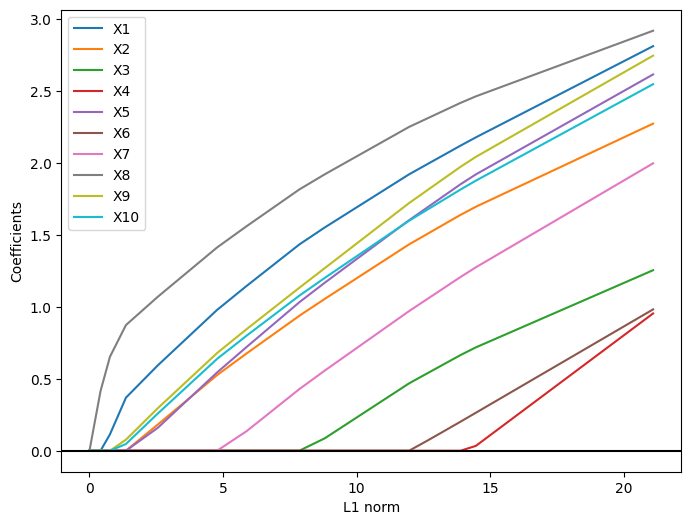

In [77]:
#plt.figure(figsize=(12,6))
plt.plot(l1_norm, coefs)
plt.axhline(y = 0, color='k')
plt.xlabel("L1 norm")
plt.ylabel("Coefficients")
plt.legend(X_train.columns);

In [78]:
from sklearn.linear_model import LassoCV
lasso10 = LassoCV()
lasso10.fit(X_train, y_train);

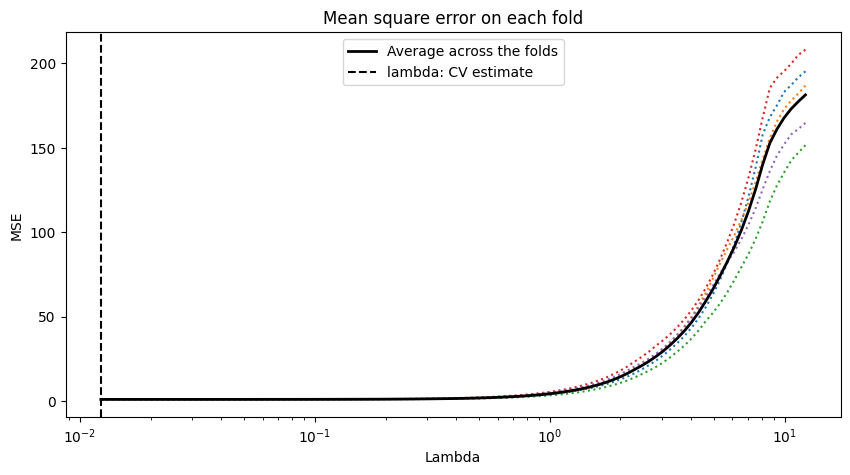

In [79]:
plt.figure(figsize=(10,5))
plt.semilogx(lasso10.alphas_, lasso10.mse_path_, ":")

plt.plot(
    lasso10.alphas_ ,
    lasso10.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso10.alpha_, linestyle="--", color="k", label="lambda: CV estimate"
)

plt.legend()
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("Mean square error on each fold")
plt.axis("tight");


In [80]:
bestlam = lasso10.alpha_
print(bestlam)

0.012276016456805589


In [81]:
lasso_pred = lasso10.predict(X_test)
lasso_MSE = np.mean((lasso_pred -y_test)**2)
print(lasso_MSE)

1.1705530488648628


Compare MSE for different models:

In [82]:
print("LM    = ", lm_MSE)
print("Ridge = ", ridge_MSE)
print("Lasso = ", lasso_MSE)

LM    =  1.1633982439088297
Ridge =  1.1638144847202938
Lasso =  1.1705530488648628


Now fit the model to the entire data.

In [83]:
out_l = LassoCV()
out_l.fit(X.iloc[:,:10], Y[:,8])

out_r = RidgeCV()
out_r.fit(X.iloc[:,:10], Y[:,8])

coef = pd.DataFrame(m10.params, columns=["Lm"])
coef["Ridge"] = np.append(out_r.intercept_, out_r.coef_)
coef["Lasso"] = np.append(out_l.intercept_, out_l.coef_)
coef["Actual"]= np.append(1, slopesSet[:10])
coef

,Lm,Ridge,Lasso,Actual
const,1.073009,1.073005,1.072799,1.000000
X1,2.785765,2.785629,2.782720,2.745217
X2,2.226037,2.225922,2.222935,2.221001
X3,1.304780,1.304710,1.301718,1.325808
X4,1.028590,1.028522,1.024612,1.038615
X5,2.633288,2.633156,2.630194,2.676778
X6,1.073931,1.073878,1.070715,1.074286
X7,2.013844,2.013746,2.010698,2.010530
X8,2.912449,2.912312,2.909793,2.872047
X9,2.769211,2.769066,2.765888,2.755692


Lasso regression improved the mean squared error relative to the linear model, but did worse than ridge regression.
It kept all 10 predictors and produced similar estimates of parameters.

## Large number of significant predictors   

Apply lasso regression analysis to data with 491 predictors.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:491], Y[:,489], 
                                                    test_size=0.5, random_state=1)


In [85]:
lambd_values = np.logspace(0, 10, 200)

coefs = []
l1_norm = []
for lambd in lambd_values:
    lasso = Lasso(alpha=lambd, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    l1_norm.append(np.sum(np.abs(lasso.coef_)))

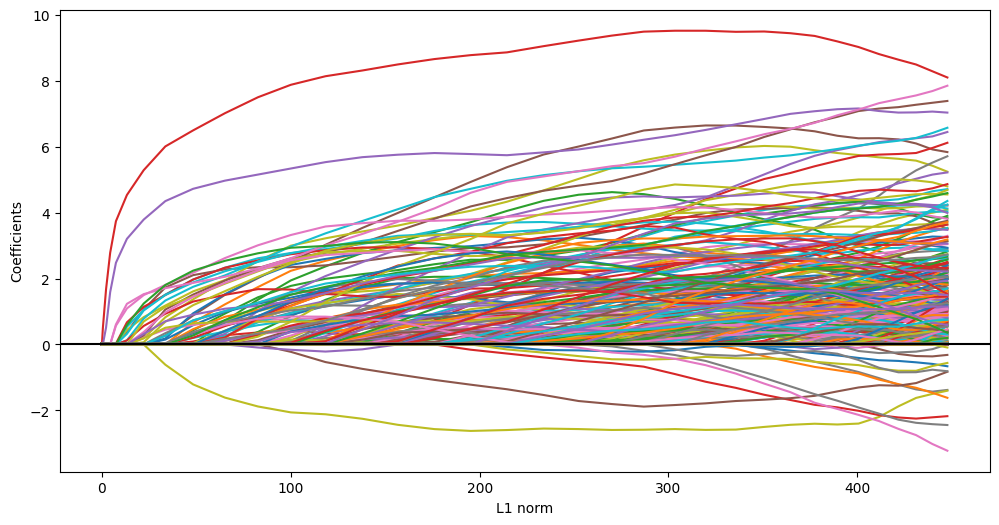

In [86]:
plt.figure(figsize=(12,6))
plt.plot(l1_norm, coefs)
plt.axhline(y = 0, color='k')
plt.xlabel("L1 norm")
plt.ylabel("Coefficients");

Note that there are no actual slopes close to zero, but lasso regression still pushes them to zero when $\lambda=0$.   

Find best $\lambda$ using cross validation.  

In [87]:
from sklearn.linear_model import LassoCV
lasso490 = LassoCV(cv=10)
lasso490.fit(X_train, y_train);

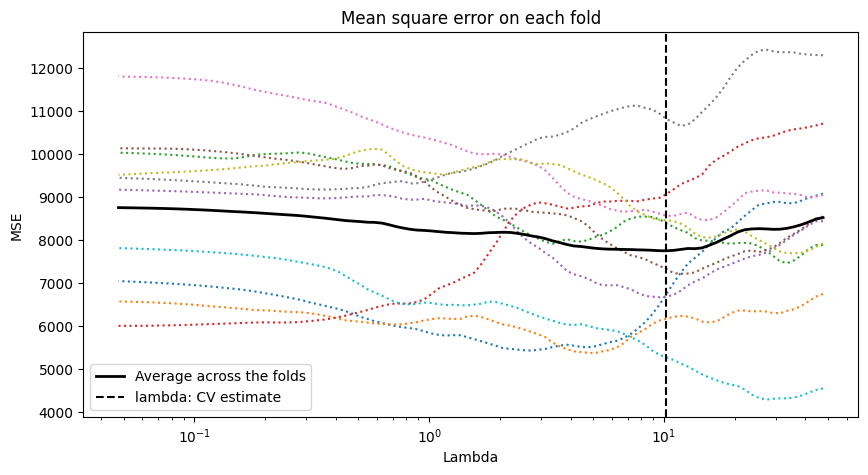

In [88]:
plt.figure(figsize=(10,5))
plt.semilogx(lasso490.alphas_, lasso490.mse_path_, ":")

plt.plot(
    lasso490.alphas_ ,
    lasso490.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso490.alpha_, linestyle="--", color="k", label="lambda: CV estimate"
)

plt.legend()
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("Mean square error on each fold")
plt.axis("tight");

In [89]:
bestlam = lasso490.alpha_
print(bestlam)

10.24530718209058


Calculate mean squares prediction error for the best lambda.    


In [90]:
lasso_pred = lasso490.predict(X_test)
lasso_MSE = np.mean((lasso_pred -y_test)**2)
print(lasso_MSE)

7757.936631627046


Fit lasso regression model to the entire data.   
Plot the set of true slopes used in simulation and mark slopes removed by lasso.   

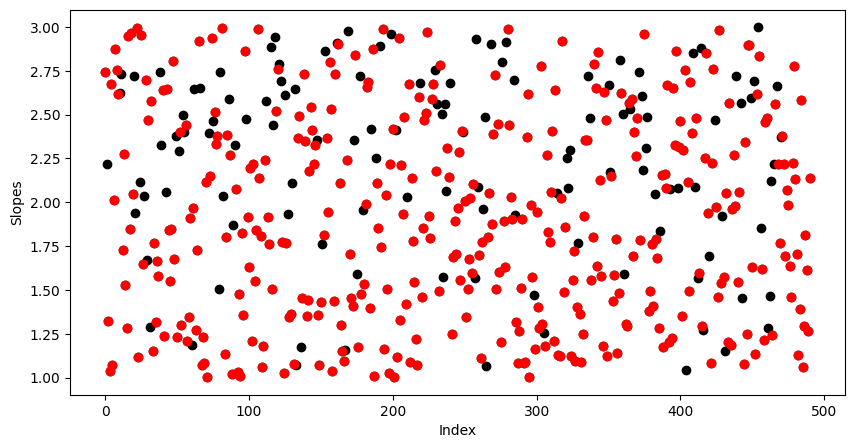

In [91]:
out = Lasso(alpha=bestlam)
out.fit(X.iloc[:,:491],Y[:,489])
lasso_coef = out.coef_
removedSlopes = np.repeat(np.nan, 491)
removedSlopes[lasso_coef==0] = slopesSet[:491][lasso_coef==0]
plt.figure(figsize=(10,5))
plt.plot(slopesSet[:491], "o", color="black")
plt.plot(removedSlopes, "o", color="red");
plt.xlabel('Index')
plt.ylabel('Slopes');

Lasso removed predictors seemingly randomly regardless of the value of slope.   
Given the way the sample was simulated (independent predictors with slopes between 1 and 3) it would be more reasonable removing none or removing the predictors with smallest slopes.


## Large number of predictors, not all of them are significant    

To check how lasso regression removes predictors modify the simulated data to make some of predictors insignificant. 


In [92]:
rng = np.random.default_rng(seed=1234567)

Epsilon = rng.normal(0,1, size=500)
colnames = [ "X%i" %(j+1) for j in range(500)]
X = pd.DataFrame(rng.normal(0,2, size=(500, 500)), columns=colnames)
slopesSet = rng.uniform(low=-0.1, high=3, size=500)


The previous set was simulated with slopes randomly selected between 1 and 3.   
Such selection of slopes made them all distinct from zero which was captured by the linear model.   
Now select slopes as random numbers between -0.1 and 3.    
Obviously, the slopes which are close to zero should appear as insignificant in a model fit.

Continue simulating the sample.

In [93]:
def idot(i,j) :
    return (1+ np.dot(X.iloc[i,:j+1],slopesSet[:j+1]) + Epsilon[i])
Y= np.array([np.array([idot(i,j) for j in np.arange(500)[1:500]]) for i in np.arange(500)])
Y = np.column_stack([1 + np.dot(X.iloc[:, :j], slopesSet[:j]) + Epsilon for j in range(2, 501)])

In [94]:
print(X.iloc[:,:6].head())

         X1        X2        X3        X4        X5        X6
0 -3.141902  1.687735  0.289772  1.710882  2.314687  1.372477
1 -1.566514  0.167255 -5.062832 -3.653958  2.297113  0.364011
2 -1.105760  1.349174  1.102168  1.706224  4.018759 -0.878840
3 -0.282560 -0.118264  1.792049 -1.254599 -1.994683 -1.645605
4 -1.074916  0.389353 -2.588905  1.070934 -0.594107 -1.723574


In [95]:
print(Y[:5,:5])

[[ -2.01177512  -1.96745012   2.00901156   6.02456127   7.91150078]
 [ -0.87895544  -1.65339211 -10.14598696  -6.16092541  -5.66046725]
 [  1.7051888    1.87378204   5.83941738  12.81121433  11.60294786]
 [  0.30905632   0.58317731  -2.33278534  -5.79318858  -8.05563578]
 [ -0.70402475  -1.10003695   1.38904685   0.35838236  -2.01125992]]


In [96]:
print(Epsilon[:6])

[ 0.58556889  0.06624446  1.80142333 -0.30670122 -0.43100349  0.79555355]


In [97]:
print(slopesSet[:6])

[1.26574648 0.22486164 0.15296512 2.32421798 1.73481328 1.37484243]


Separate the sample into train and test and fit lasso.

In [98]:
X_train, X_test = train_test_split(X.iloc[:,:491], test_size=0.5, random_state=1)
y_train, y_test = train_test_split(Y[:,489], test_size=0.5, random_state=1)

In [99]:
lambd_values = np.logspace(0, 10, 200)

coefs = []
l1_norm = []
for lambd in lambd_values:
    out = Lasso(alpha=lambd, fit_intercept=False)
    out.fit(X_train, y_train)
    coefs.append(out.coef_)
    l1_norm.append(np.sum(np.abs(out.coef_)))

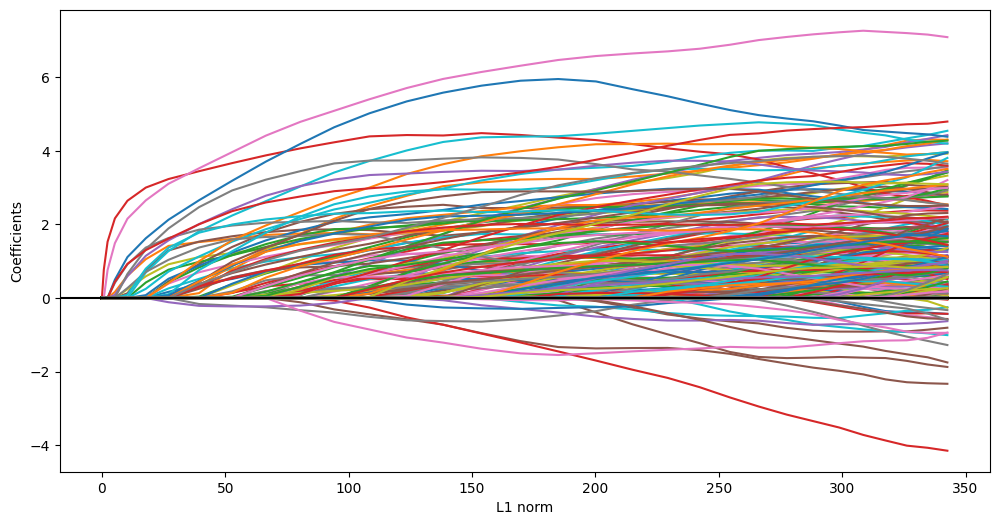

In [100]:
plt.figure(figsize=(12,6))
plt.plot(l1_norm, coefs)
plt.axhline(y = 0, color='k')
plt.xlabel("L1 norm")
plt.ylabel("Coefficients");

Select best $\lambda$ using cross validation.

<span style="color:red">(Skipped Code)</span>

In [101]:
outCV = LassoCV(cv=10)
outCV.fit(X_train, y_train);

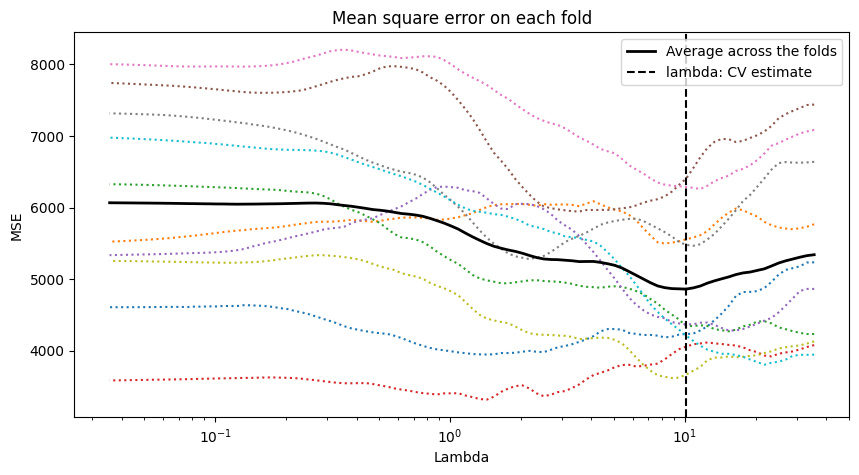

In [102]:
plt.figure(figsize=(10,5))
plt.semilogx(outCV.alphas_, outCV.mse_path_, ":")

plt.plot(
    outCV.alphas_ ,
    outCV.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    outCV.alpha_, linestyle="--", color="k", label="lambda: CV estimate"
)

plt.legend()
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("Mean square error on each fold")
plt.axis("tight");

In [103]:
bestlam = outCV.alpha_
print(bestlam)

10.123675054167657


Fit lasso to the entire sample using best λ.

<span style="color:red">(Skipped Code)</span>

In [104]:
out = Lasso(alpha=bestlam)
out.fit(X.iloc[:,:491], Y[:,489])

Lasso(alpha=np.float64(10.123675054167657))

Find resulting coefficients.   
Plot actual slopes and mark the slopes removed by lasso.

<span style="color:red">(Skipped Code)</span>


In [105]:
lasso_coef = out.coef_
removedSlopes = np.repeat(np.nan, 491)
removedSlopes[lasso_coef==0] = slopesSet[:491][lasso_coef==0]

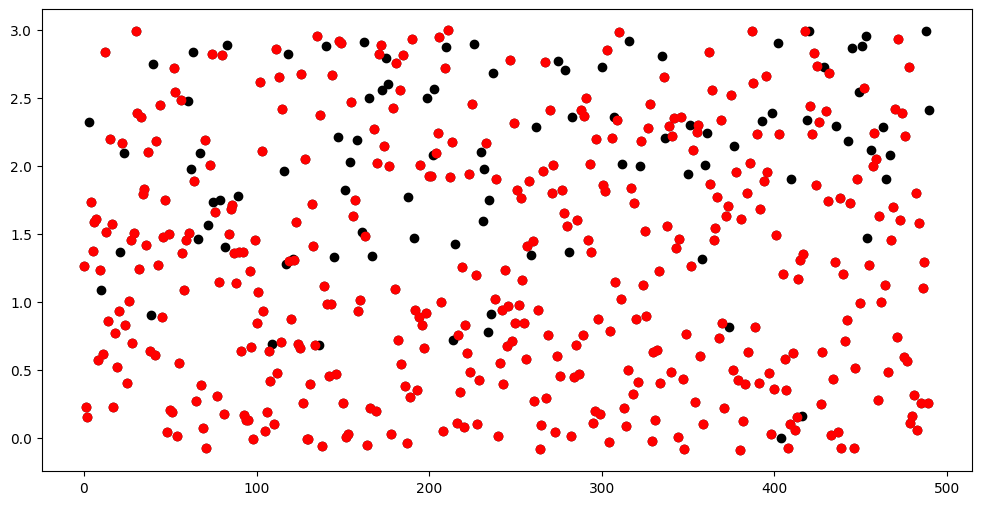

In [106]:
plt.figure(figsize=(12,6))
plt.plot(slopesSet[:491], "o", color="black")
plt.plot(removedSlopes, "o", color="red");

Make the same plot marking actual slopes removed by linear model.

<span style="color:red">(Skipped Code)</span>

In [107]:
m491 = sm.OLS(Y[:,489],sm.add_constant(X.iloc[:,:491])).fit()              

Check the coefficients that you obtained

In [108]:
print(m491.params[:10])

const    0.935239
X1       1.614357
X2       0.190255
X3       0.000516
X4       2.038601
X5       1.514087
X6       1.527538
X7       1.542988
X8       1.750160
X9       0.457521
dtype: float64


Make plot showing slopes of removed predictors.

<span style="color:red">(Skipped Code)</span>

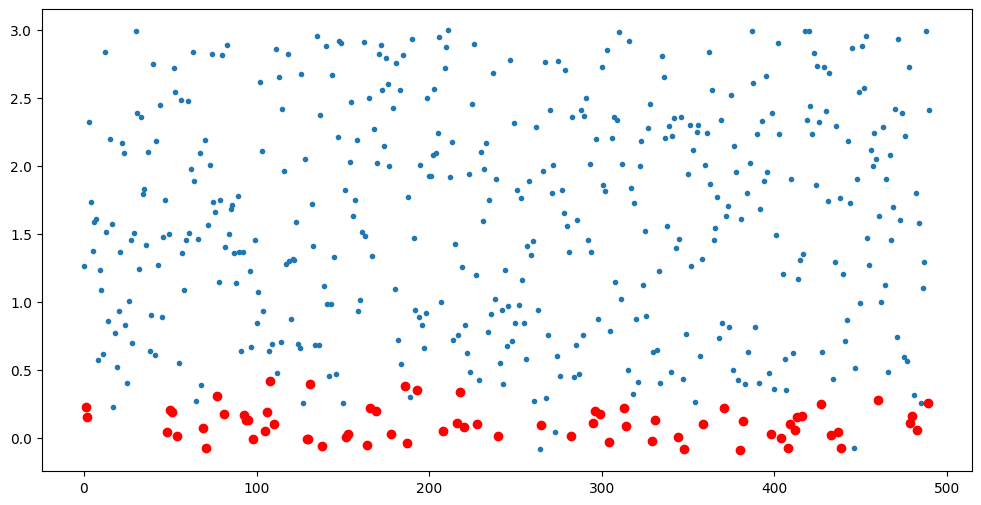

In [111]:
eliminatedByLm = m491.pvalues[1:] > 0.05
removedSlopes = np.repeat(np.nan, 491)
removedSlopes[eliminatedByLm] = slopesSet[:491][eliminatedByLm]

plt.figure(figsize=(12,6))
plt.plot(slopesSet[:491], ".")
plt.plot(removedSlopes, "o", color="red");

In [5]:
import os

In [6]:
data_path = "data"
data = pd.read_csv(os.path.join(data_path,"test_sample.csv"))

In [7]:
data

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489
0,15.565723,-1.699881,0.643882,3.578086,1.758678,0.743186,2.975388,1.457331,4.162498,-2.674536,...,-0.900599,1.432097,-0.826640,-1.429938,-1.294035,-1.588638,-0.968278,-1.968609,-0.545746,0.382558
1,54.665174,1.165815,-1.649199,-2.352141,-0.266735,3.371400,-1.719108,-2.636915,-4.561626,2.445931,...,-0.250215,1.714690,1.435048,-2.804768,1.573279,-1.057443,2.255505,-2.211151,3.702439,-0.313596
2,93.605785,-1.035768,0.461944,-0.850344,-0.309781,-3.195392,-0.207955,1.265891,-2.062982,-0.575336,...,-2.375347,1.479593,-1.231715,0.068434,-1.746882,3.042048,0.036323,0.010657,3.250914,1.275056
3,4.610944,-1.659483,-0.284195,1.078329,-1.935833,-1.037568,0.022067,1.509983,-0.746185,-2.027216,...,0.630631,1.362426,1.953585,5.484581,3.571658,-3.103641,-0.136437,1.420495,0.960846,-1.153423
4,1.056500,1.951478,-1.664935,2.300337,-0.656666,0.926606,-1.657802,0.984092,1.158438,1.008546,...,1.684160,-0.152397,0.006115,2.250887,3.548790,0.163594,2.791572,1.219216,1.599131,2.089636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.130683,1.839332,-1.803775,-0.384746,2.539919,2.207427,3.159325,1.185968,-1.087903,-1.972747,...,-0.143103,-1.386973,0.888263,-1.277663,2.098504,1.593652,-0.493335,0.904438,-1.645699,0.905478
496,-105.473679,-2.895938,-1.431870,-2.164440,2.057245,4.540260,-1.331209,1.140524,3.080852,3.110271,...,-0.815655,-2.478341,5.129197,-0.690263,-1.501985,-0.301081,-1.072401,-0.444248,1.375331,-1.950248
497,16.919226,2.058374,1.109581,1.480019,-1.705530,1.284731,1.743298,2.795620,1.745287,1.743335,...,0.680369,-0.110243,1.291420,1.242201,0.113423,3.593107,0.254195,-0.080537,-2.229228,-4.743834
498,-2.312470,1.549956,-1.587771,-1.549037,-2.305826,-0.192378,0.152990,-2.531413,2.431647,-1.299048,...,3.372545,-1.566816,1.016912,0.035271,2.656667,-1.787562,2.409658,-0.477060,-1.291285,-1.830911


In [8]:
Y = data.iloc[:, 0]
X = data.iloc[:, 1:]


In [9]:
Y.shape

(500,)

In [10]:
X.shape

(500, 490)

In [17]:
from sklearn.linear_model import LassoCV, Lasso

In [18]:
lasso_cv = LassoCV(cv=5, random_state=1)

lasso_cv.fit(X, Y)

alpha_min = lasso_cv.alpha_
alpha_min

np.float64(0.019485649349881482)

In [19]:

lasso = Lasso(alpha=alpha_min, random_state=1)
lasso.fit(X, Y)

lasso_coefficients = lasso.coef_
lasso_coefficients

array([ 3.14827286e-01,  2.34280768e-01,  1.39729622e+00,  1.07105497e+00,
        1.67545996e+00,  1.49457525e+00,  8.86297983e-01,  3.51950816e-01,
        1.52754097e+00,  1.22895672e+00,  0.00000000e+00,  8.03797515e-01,
        1.74440804e+00,  2.20209830e+00,  1.69666920e+00,  1.53498084e+00,
        1.21882573e+00,  8.29626460e-01,  1.16378317e+00, -1.43262980e-01,
       -4.81823463e-01,  2.56742839e-01,  1.34742580e+00,  1.10115637e-01,
        1.66989137e+00,  1.28704327e-01,  1.42443550e-01,  8.35121635e-01,
        3.79486177e-01,  0.00000000e+00,  5.40437783e-01,  6.61387101e-01,
        9.57455045e-01,  7.00872816e-01,  4.51332432e-01,  0.00000000e+00,
        9.55251103e-01,  3.01027279e-02,  1.42085892e+00,  1.96062714e+00,
        1.48449274e+00,  9.29613362e-01,  1.56103652e+00,  9.86807140e-01,
        1.48081296e+00,  9.16623294e-01,  4.13230137e-01,  1.41908784e+00,
       -1.23198919e-01,  4.80964093e-03,  1.05141009e+00,  2.06791165e+00,
        1.18343425e+00, -

In [20]:
out = Lasso(alpha=alpha_min, random_state=1)
out.fit(X, Y)
lasso_coef = out.coef_
lasso_coef

array([ 3.14827286e-01,  2.34280768e-01,  1.39729622e+00,  1.07105497e+00,
        1.67545996e+00,  1.49457525e+00,  8.86297983e-01,  3.51950816e-01,
        1.52754097e+00,  1.22895672e+00,  0.00000000e+00,  8.03797515e-01,
        1.74440804e+00,  2.20209830e+00,  1.69666920e+00,  1.53498084e+00,
        1.21882573e+00,  8.29626460e-01,  1.16378317e+00, -1.43262980e-01,
       -4.81823463e-01,  2.56742839e-01,  1.34742580e+00,  1.10115637e-01,
        1.66989137e+00,  1.28704327e-01,  1.42443550e-01,  8.35121635e-01,
        3.79486177e-01,  0.00000000e+00,  5.40437783e-01,  6.61387101e-01,
        9.57455045e-01,  7.00872816e-01,  4.51332432e-01,  0.00000000e+00,
        9.55251103e-01,  3.01027279e-02,  1.42085892e+00,  1.96062714e+00,
        1.48449274e+00,  9.29613362e-01,  1.56103652e+00,  9.86807140e-01,
        1.48081296e+00,  9.16623294e-01,  4.13230137e-01,  1.41908784e+00,
       -1.23198919e-01,  4.80964093e-03,  1.05141009e+00,  2.06791165e+00,
        1.18343425e+00, -

In [121]:
eliminated_by_Lasso = np.where(lasso_coefficients == 0)[0]


In [122]:
eliminated_by_Lasso

array([ 10,  29,  35,  61,  71,  84, 102, 114, 168, 184, 210, 211, 234,
       236, 262, 345, 411, 468, 484])

In [179]:
eliminated_by_Lasso

array([ 10,  29,  35,  61,  71,  84, 102, 114, 168, 184, 210, 211, 234,
       236, 262, 345, 411, 468, 484])

In [166]:
ols_model = sm.OLS(Y, sm.add_constant(X)).fit()


In [167]:
p_values = ols_model.pvalues[1:] 
p_values


X0      2.503892e-02
X1      1.047463e-10
X2      1.233073e-16
X3      1.917675e-15
X4      2.597734e-15
            ...     
X485    7.718997e-15
X486    8.020868e-15
X487    8.740074e-06
X488    1.805935e-08
X489    2.192703e-16
Length: 490, dtype: float64

In [168]:
eliminated_by_lm = p_values[p_values > 0.1].index


In [169]:
eliminated_by_lm

Index(['X29', 'X48', 'X65', 'X102', 'X121', 'X137', 'X211', 'X231', 'X234',
       'X238', 'X262', 'X390', 'X418', 'X437'],
      dtype='object')

In [170]:
eliminated_by_lm_indices = [int(col[1:]) for col in eliminated_by_lm]


In [171]:
eliminated_by_lm_indices

[29, 48, 65, 102, 121, 137, 211, 231, 234, 238, 262, 390, 418, 437]

In [172]:
lasso_zeros = ' '.join([str(idx) for idx in eliminated_by_Lasso])
lm_zeros = ' '.join([str(idx) for idx in eliminated_by_lm])
pd.DataFrame([lasso_zeros,lm_zeros], index = ['eliminated_by_Lasso','eliminated_by_lm']).to_csv('answer.csv')